In [1]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')

In [4]:
cond = df['Species'].isin(['Bream', 'Smelt'])
fish_data = df.loc[cond, ['Length2', 'Weight']]
fish_data.head()

,Length2,Weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [6]:
fish_target = df.loc[cond, ['Species']]
# fish_target

In [7]:
# sklearn 유틸리티 도구 : train_test_split => 데이터를 무작위로 섞고 자르기까지
# 기본적으로 train 75%, test 25%
from sklearn.model_selection import train_test_split

In [10]:
train_input, test_input, train_target, test_target = \ # \: 한 줄 내려서 코드 이어쓰기
train_test_split(fish_data, fish_target)
# fish_data와 fish_target데이터를 각각 train 데이터의 데이터와 결과값, test 데이터의 데이터와 결과값 총 4개의 데이터로 나눔

In [15]:
# test_target

,Species
11,Bream
148,Smelt
18,Bream
21,Bream
27,Bream
12,Bream
13,Bream
150,Smelt
155,Smelt
19,Bream


In [18]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_input, train_target['Species'])

KNeighborsClassifier()

In [19]:
kn.score(test_input, test_target['Species'])

1.0

In [20]:
kn.predict([[25, 150]])

C:\Users\1-13\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Smelt'], dtype=object)

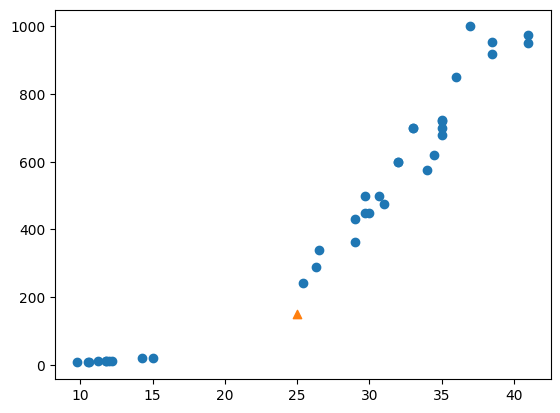

In [23]:
import matplotlib.pyplot as plt

plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(25, 150, marker='^')

In [24]:
kn.kneighbors([[25, 150]]) # [25, 150]와 가까이에 있는 데이터의 인덱스 번호와 거리를 보여줌

C:\Users\1-13\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[ 92.00086956, 130.48375378, 130.73859415, 138.39320793,
         140.00603558]]),
 array([[ 1, 19,  4,  8, 25]]))

In [27]:
mean = train_input.mean()
std = train_input.std()
print(mean)
print(std)

Length2     27.138889
Weight     456.180556
dtype: float64
Length2     10.257716
Weight     336.405622
dtype: float64


In [30]:
# 표준점수 (원본데이터 - 평균) / 표준편차
train_scaled = (train_input - mean) /  std

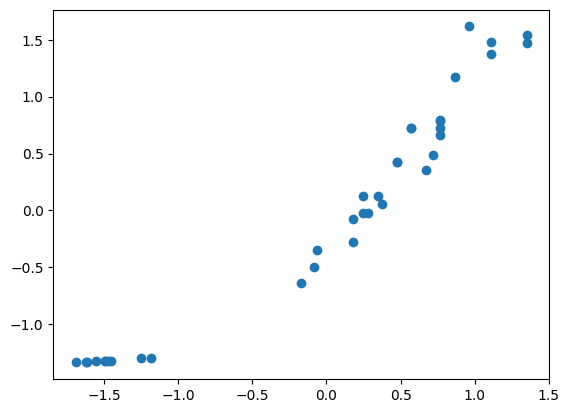

In [31]:
plt.scatter(train_scaled['Length2'], train_scaled['Weight'])

In [32]:
kn.fit(train_scaled, train_target['Species'])

KNeighborsClassifier()

In [33]:
test_scaled = (test_input - mean) / std

In [34]:
kn.score(test_scaled, test_target['Species'])

1.0